In [44]:
!wget https://github.com/boedybios/kaggle_explorations/raw/master/Iris_Data_Classification_and_EDA/dataset/iris/Iris.csv

--2021-09-28 05:47:42--  https://github.com/boedybios/kaggle_explorations/raw/master/Iris_Data_Classification_and_EDA/dataset/iris/Iris.csv
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/boedybios/kaggle_explorations/master/Iris_Data_Classification_and_EDA/dataset/iris/Iris.csv [following]
--2021-09-28 05:47:42--  https://raw.githubusercontent.com/boedybios/kaggle_explorations/master/Iris_Data_Classification_and_EDA/dataset/iris/Iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5107 (5.0K) [text/plain]
Saving to: ‘Iris.csv.1’

Iris.csv.1          100%[===================>]   4.99K  -

In [45]:
#mengimport numpy, pandas dan scipy
import numpy as np
import pandas as pd
from scipy import stats

In [46]:
#membaca dataset dari file ke pandas dataFrame
iris_Dataset = pd.read_csv('/content/Iris.csv',
                          delimiter=',', header=0)

In [47]:
iris_Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [48]:
#mengubah kelas (kolom "Species") dari string ke unique-integer
iris_Dataset["Species"] = pd.factorize(iris_Dataset.Species)[0]
#menghapus kolom "Id"
iris_Dataset = iris_Dataset.drop(labels="Id", axis=1)

In [49]:
iris_Dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
iris_Dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [54]:
import seaborn as sns

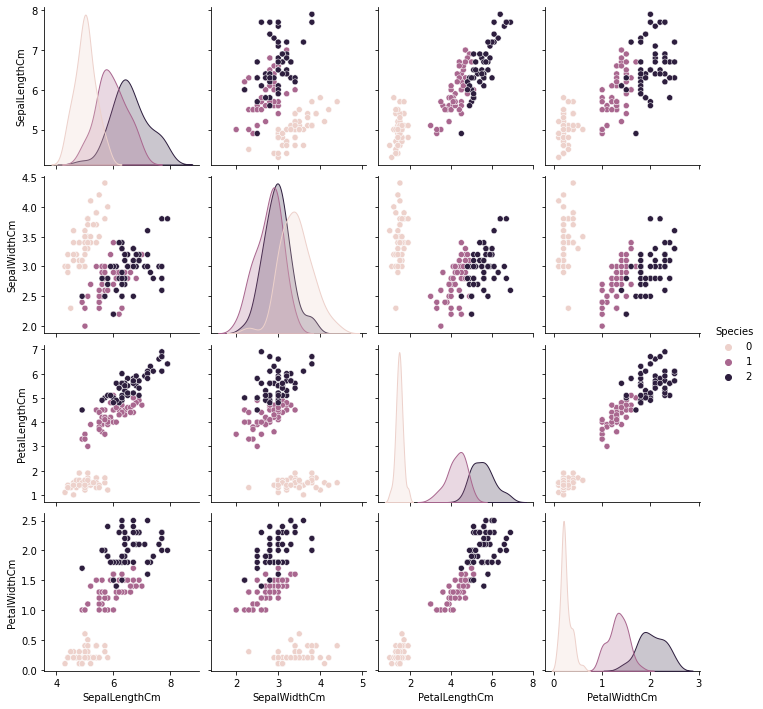

In [55]:
sns.pairplot(iris_Dataset, hue='Species')

In [64]:
#bagi kolom dataset X itu SepalLengthCm dan kawan kawan Y itu label nya
X = iris_Dataset.iloc[:, :-1].values
y = iris_Dataset.iloc[:, 4].values

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, stratify=y, random_state=42)

In [68]:
from sklearn.preprocessing import LabelEncoder

In [69]:
# label encoding
lb = LabelEncoder()
lb.fit(y_train)

y_train = lb.transform(y_train)
y_test = lb.transform(y_test)

In [71]:
from sklearn.preprocessing import StandardScaler

In [72]:
#standarisasi
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import matplotlib.pyplot as plt

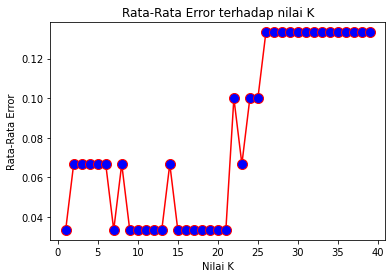

In [76]:
error = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

plt.figure()
plt.plot(range(1, 40), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Rata-Rata Error terhadap nilai K')
plt.xlabel('Nilai K')
plt.ylabel('Rata-Rata Error')
plt.show()

**TRAINING**

In [77]:
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [79]:
y_pred = classifier.predict(X_test)

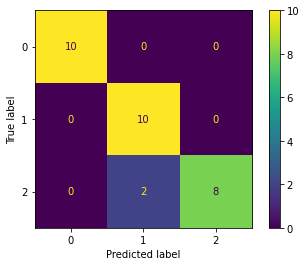

In [80]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lb.classes_).plot()